`import library`

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

`connect GoogleDrive`

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`read data`

In [81]:
data= pd.read_csv('/content/drive/MyDrive/project/PORTODATA/gojekdataset/gofood_dataset.csv')
data.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


`check unique / value variabel`

In [82]:
for i in data.columns:
  print('Value Variabel {} adalah {}'.format(i,data[i].unique()))

Value Variabel merchant_name adalah ['330 Kopi, Ciledug' 'Abe Steak, Cibubur' 'Abuba Steak, Cikarang'
 'Aneka Gorengan Siaga' 'Arangsimpur' 'Ayam Trolok' 'BABAKARAN BUNDA DAFA'
 'Bakerman, SCBD' 'Bakmi Kun' 'Bakmi Lopui 93' 'Bakso Titoti, Parung'
 'Banzai!, Bogor Utara' 'Sosis Bakar By Basis.Kuy, Intercon'
 'Bebek Boedjang, BSD' 'Boonsikdang, Hublife Jakarta'
 'Bunga Bakery, Cibinong' 'Bunga Bakery, Depok' 'Burger Bros, Bintaro'
 'Burger Bros, Ciledug' 'Burger Naura' 'C7HomeCoffee' 'Cafe OTSS'
 'Cake Pandeglang Cake' 'Chateraise, Senayan City' 'CIATER BEACH'
 'Cimory Condet, Balekambang' 'Cinepolis, Pondok Kelapa' 'Coffee First'
 'Corndog Doona, Pinang' 'Corndog Mozarella' 'Cotta Coffee, Jatiwaringin'
 'Crackling' 'Dapur Aliqa, Gembong' 'Dapur Cokelat, Cibubur'
 'Dapur Cokelat, Ciputat' 'Dapur Cokelat, Ciracas' 'Dapur Cokelat, Depok'
 'Dear Butter, Pakubuwono' 'Dough Lab, Senopati' 'DuriAnd, Bogor'
 'Emados Shawarma, Condet' 'Emados Shawarma, Depok' 'Faasos, Bintaro'
 'Faasos, Blok M' 

In [83]:
for i in data.columns:
  print('Jumlah Variasi V {} sebanyak {}'.format(i,data[i].nunique()))

Jumlah Variasi V merchant_name sebanyak 687
Jumlah Variasi V merchant_area sebanyak 3
Jumlah Variasi V category sebanyak 333
Jumlah Variasi V display sebanyak 2986
Jumlah Variasi V product sebanyak 23917
Jumlah Variasi V price sebanyak 1769
Jumlah Variasi V discount_price sebanyak 553
Jumlah Variasi V isDiscount sebanyak 2
Jumlah Variasi V description sebanyak 12362


`check tipe data dan missing value`

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


`persentase missing value`

In [85]:
(data.isna().sum()*100/len(data)).sort_values(ascending=False)

discount_price    93.941808
description       51.941586
merchant_name      0.000000
merchant_area      0.000000
category           0.000000
display            0.000000
product            0.000000
price              0.000000
isDiscount         0.000000
dtype: float64

In [86]:
data_with_desc_disc = data.copy()
discprice = data_with_desc_disc[data_with_desc_disc.discount_price.notnull()]
datadesc = data_with_desc_disc[data_with_desc_disc.description.notnull()]

#**Data Preprocessing**

`split variabel, hapus missingvalue`

In [87]:
data[['Brand','Lokasi']] = data['merchant_name'].str.split(',',expand=True,n=2)
data.drop(['discount_price','description'],axis=1,inplace=True)
data.head()

,merchant_name,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0,330 Kopi,Ciledug
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0,330 Kopi,Ciledug
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0,330 Kopi,Ciledug
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0,330 Kopi,Ciledug
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0,330 Kopi,Ciledug


In [88]:
#membuat lowercase
data = data.apply(lambda x: x.astype(str).str.lower())

#hapus tanda baca
data['Brand'] = data['Brand'].str.replace(r'[^\w\s]+', '')
data['display'] = data['display'].str.replace(r'[^\w\s]+', '')

#hapus whitespace
data = data.apply(lambda x: x.astype(str).str.strip())

data_category = data.copy()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,merchant_name,merchant_area,category,display,product,price,isDiscount,Brand,Lokasi
0,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0,330 kopi,ciledug
1,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0,330 kopi,ciledug
2,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0,330 kopi,ciledug
3,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0,330 kopi,ciledug
4,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0,330 kopi,ciledug


#**EDA**

`Diskon pada Brand~Kota`

Text(0, 0.5, '')

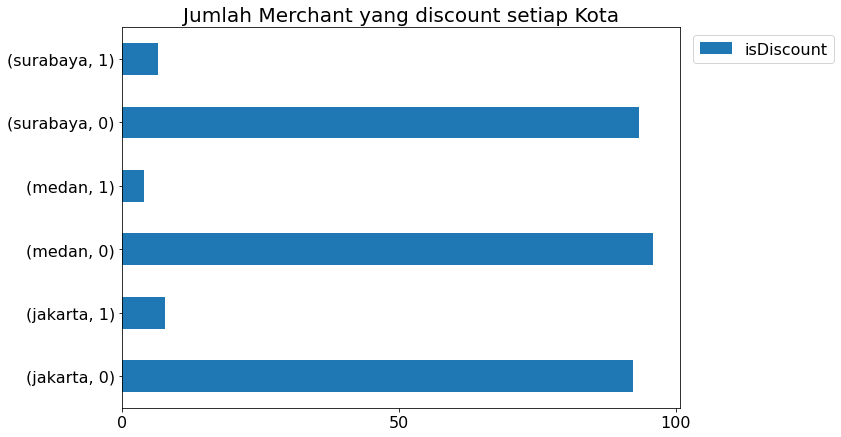

In [89]:
df = data.groupby(['merchant_area','isDiscount']).agg({'isDiscount': 'count'})
percen = data.groupby(['merchant_area']).agg({'isDiscount': 'count'})
df = df.div(percen, level='merchant_area') * 100
plt.rcParams["figure.figsize"] = (10,7)
df.plot(kind='barh')
plt.title("Jumlah Merchant yang discount setiap Kota",fontsize=20)
plt.legend(loc='upper center',bbox_to_anchor=(1.15, 1),fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0., 10., 20., 30.]), <a list of 4 Text major ticklabel objects>)

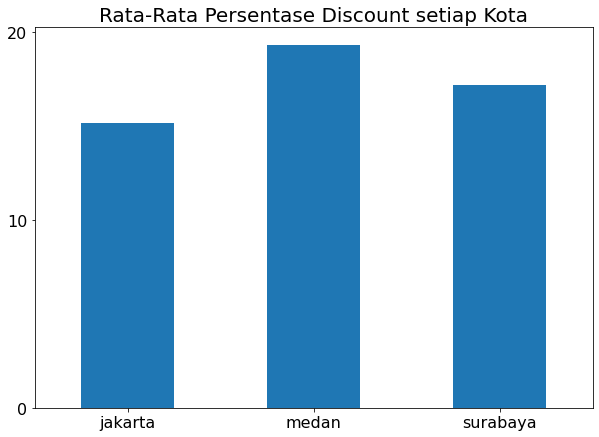

In [90]:
discprice = data_with_desc_disc[data_with_desc_disc.discount_price.notnull()]
discprice['perc_disc'] = 100*(discprice['price']-discprice['discount_price'])/discprice['price']
plt.rcParams["figure.figsize"] = (10,7)
discprice.groupby('merchant_area').mean()['perc_disc'].plot(kind='bar')
plt.title("Rata-Rata Persentase Discount setiap Kota", fontsize = 20)
plt.xlabel('')
plt.xticks(fontsize=16,rotation='0')
plt.yticks(fontsize=16)

`persentase diskon brand tertinggi (with location)`

In [91]:
disc = pd.DataFrame()
col = discprice['merchant_area'].unique()

for i in col:
  df = discprice[discprice.merchant_area==i]
  df[['Brand','Lokasi']] = df['merchant_name'].str.split(',',expand=True,n=2)
  df = pd.DataFrame(df.groupby('Brand').mean()['perc_disc'].sort_values(ascending=False).head(10)).reset_index()
  df = pd.concat([disc, df]).head(10)
  print('rata-rata persentase diskon brand kota {}\n'.format(i),df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


rata-rata persentase diskon brand kota jakarta
                 Brand  perc_disc
0           Starbucks  35.654214
1            XXI Cafe  34.242424
2           Cinepolis  31.250000
3       Golden Lamian  30.769231
4            Xi Bo Ba  30.555556
5              XIBOBA  30.555556
6          FamilyMart  28.512657
7       Murabae Bento  27.914286
8       Corndog Doona  25.921414
9  Sosis Bakar Gangan  23.529412
rata-rata persentase diskon brand kota medan
                       Brand  perc_disc
0            Ahmeds Kitchen  39.460069
1                 Starbucks  35.654214
2  Grand Liberty Restaurant  34.993939
3      Bolen Quemami Bakery  33.173363
4           Shawarma Sultan  32.071980
5             Warung Jivano  29.435631
6                  Xi Bo Ba  26.829268
7           Siomay Podomoro  24.935931
8                    Kokumi  22.981920
9                 Sushi Yay  22.668969
rata-rata persentase diskon brand kota surabaya
                     Brand  perc_disc
0                Wingstop  3

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [92]:
disc = pd.DataFrame()
col = discprice['merchant_area'].unique()

for i in col:
  filter = discprice[discprice.merchant_area==i].sort_values("perc_disc",ascending=False).head(50)
  filter.drop(filter.columns[[2,3,4,5,6,7,8]],axis=1,inplace=True)
  filter.drop_duplicates('merchant_name',inplace=True)
  disc = pd.concat([disc, filter])

print(disc)

                         merchant_name merchant_area  perc_disc
12554        Starbucks, Sudirman Bogor       jakarta  56.140351
1829             Corndog Doona, Pinang       jakarta  50.000000
2846          FamilyMart, Sequis Tower       jakarta  50.000000
13956                    XXI Cafe, PGC       jakarta  36.363636
4106              HokBen, Bogor Yasmin       jakarta  35.000000
14044                   Ahmeds Kitchen         medan  68.181818
15499             Bolen Quemami Bakery         medan  60.606061
29238           Warung Jivano, Marelan         medan  59.701493
27367       Starbucks, Multatuli Medan         medan  56.140351
27957       Sushi Yay, Medan Setiabudi         medan  50.000294
25505         Richeese Factory, Binjai         medan  50.000000
26746       Shawarma Sultan, Setiabudi         medan  43.290043
15839           Burger King, Ring Road         medan  37.962963
14979  Besty Cemilan, Kapten Sumarsono         medan  37.254902
19131         Grand Liberty Restaurant  

In [93]:
discprice.groupby('merchant_area').agg({'perc_disc': ['mean', 'min', 'max']})

perc_disc                     
                    mean       min        max
merchant_area                                
jakarta        15.172176  0.722022  56.140351
medan          19.275210  2.298851  68.181818
surabaya       17.188809  1.785714  52.727273

`Most Brand Repeat Order`

In [94]:
df = pd.DataFrame(data.groupby('merchant_area')['Brand'].value_counts().unstack(fill_value=0).T)

jkt = df.sort_values(['jakarta'],ascending=False).head(5)
display('Jakarta most Brand repeat order =', jkt)
print('\n')
mdn = df.sort_values(['medan'],ascending=False).head(5)
display('Medan most Brand repeat order =', mdn)
print('\n')
sby = df.sort_values(['surabaya'],ascending=False).head(5)
display('Surabaya most Brand repeat order =', sby)

'Jakarta most Brand repeat order ='

merchant_area,jakarta,medan,surabaya
Brand,,,
lawson,1795,0,0
mcdonalds,905,125,250
dapur cokelat,549,0,0
michelle bakery,474,0,0
kfc,393,400,63


'Medan most Brand repeat order ='

merchant_area,jakarta,medan,surabaya
Brand,,,
choco bakery,0,592,0
bika ambon zulaikha,0,435,0
zeribowl,0,426,0
kfc,393,400,63
chicken crush,0,400,0


'Surabaya most Brand repeat order ='

merchant_area,jakarta,medan,surabaya
Brand,,,
holland bakery,240,0,594
kampoeng roti,0,0,331
haus,0,0,273
satria roti,0,0,257
warung pindo,0,0,254


In [95]:
df = df[(df.jakarta != 0) & (df.medan != 0) & (df.surabaya != 0)]
df.sort_values(['jakarta','medan','surabaya'],ascending=False).head(5)

merchant_area,jakarta,medan,surabaya
Brand,,,
mcdonalds,905,125,250
kfc,393,400,63
menantea,280,40,116
burger bros,229,69,69
dear butter,26,26,54


`Most Brand Merchant`

In [96]:
df = data.drop_duplicates('merchant_name')
df = pd.crosstab(df['Brand'],df['merchant_area'])

jkt = df.sort_values(['jakarta'],ascending=False).head(5)
display('Jakarta most Brand Merchant =', jkt)
print('\n')
mdn = df.sort_values(['medan'],ascending=False).head(5)
display('Medan most Brand Merchant =', mdn)
print('\n')
sby = df.sort_values(['surabaya'],ascending=False).head(5)
display('Surabaya most Brand Merchant =', sby)

'Jakarta most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
lawson,8,0,0
keikpop,7,0,1
menantea,7,1,2
kfc,5,4,1
mcdonalds,4,1,1


'Medan most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
kfc,5,4,1
zeribowl,0,3,0
qiuqiunian,0,3,0
sippin,0,3,0
chicken crush,0,3,0


'Surabaya most Brand Merchant ='

merchant_area,jakarta,medan,surabaya
Brand,,,
haus,0,0,3
suweger,0,0,3
xiboba,3,0,3
kampoeng roti,0,0,3
satria roti,0,0,2


In [97]:
df = df[(df.jakarta != 0) & (df.medan != 0) & (df.surabaya != 0)]
df.sort_values(['jakarta','medan','surabaya'],ascending=False).head(5)

merchant_area,jakarta,medan,surabaya
Brand,,,
menantea,7,1,2
kfc,5,4,1
mcdonalds,4,1,1
burger bros,2,1,1
dear butter,1,1,1


`split variabel kategori`

In [98]:
data_category[['category1','category2','category3','category4','category5']] = data_category['category'].str.split('/',expand=True,n=5)

In [99]:
cat1 = data_category['category1'].unique().tolist()
cat2 = data_category['category2'].unique().tolist()
cat3 = data_category['category3'].unique().tolist()
cat4 = data_category['category4'].unique().tolist()
cat5 = data_category['category5'].unique().tolist()

cat = cat1 + cat2 + cat3 + cat4 + cat5
cat = list(set(cat))
cat = [x for x in cat if x is not None]
print(cat)

['seafood', 'aneka nasi', 'barat', 'thailand', 'sweets', 'bakso & soto', 'jepang', 'timur tengah', 'martabak', 'korea', 'ayam & bebek', 'bakmie', 'chinese', 'kopi', 'jajanan', 'india', 'pizza & pasta', 'minuman', 'cepat saji', 'roti', 'sate']


`Most Category Merchant`

In [100]:
city = data['merchant_area'].unique()
kota = []
kategori = []
jlh_merchant = []

for i in city:
  for j in cat:
    data_city = data[data.merchant_area==i]
    n = data_city[data_city.category.str.startswith(j)].drop_duplicates('merchant_name').shape[0]
    kota.append(i)
    kategori.append(j)
    jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, jlh_merchant)),columns =['Kota', 'Kategori', 'jumlah merchant'])

jkt = df[df.Kota=='jakarta'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Jakarta most Category Merchant =', jkt)
print('\n')
mdn = df[df.Kota=='medan'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Medan most Category Merchant =', mdn)
print('\n')
sby = df[df.Kota=='surabaya'].sort_values(['jumlah merchant'],ascending=False).head(5)
display('Surabaya most Category Merchant =', sby)

'Jakarta most Category Merchant ='

,Kota,Kategori,jumlah merchant
17,jakarta,minuman,35
14,jakarta,jajanan,32
18,jakarta,cepat saji,24
4,jakarta,sweets,21
1,jakarta,aneka nasi,20


'Medan most Category Merchant ='

,Kota,Kategori,jumlah merchant
35,medan,jajanan,43
38,medan,minuman,41
22,medan,aneka nasi,30
39,medan,cepat saji,24
34,medan,kopi,19


'Surabaya most Category Merchant ='

,Kota,Kategori,jumlah merchant
59,surabaya,minuman,56
56,surabaya,jajanan,46
43,surabaya,aneka nasi,35
60,surabaya,cepat saji,21
61,surabaya,roti,20


In [101]:
#filter most category
most_cat = ['minuman','jajanan','aneka nasi','cepat saji','roti','kopi']

`Few Category Merchant`

In [102]:
jkt = df[df.Kota=='jakarta'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Jakarta few Category Merchant =', jkt)
print('\n')
mdn = df[df.Kota=='medan'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Medan few Category Merchant =', mdn)
print('\n')
sby = df[df.Kota=='surabaya'].sort_values(['jumlah merchant'],ascending=True).head(5)
display('Surabaya few Category Merchant =', sby)

'Jakarta few Category Merchant ='

,Kota,Kategori,jumlah merchant
3,jakarta,thailand,0
7,jakarta,timur tengah,0
0,jakarta,seafood,1
15,jakarta,india,1
12,jakarta,chinese,1


'Medan few Category Merchant ='

,Kota,Kategori,jumlah merchant
28,medan,timur tengah,0
41,medan,sate,1
37,medan,pizza & pasta,1
24,medan,thailand,1
36,medan,india,1


'Surabaya few Category Merchant ='

,Kota,Kategori,jumlah merchant
57,surabaya,india,0
45,surabaya,thailand,1
49,surabaya,timur tengah,1
62,surabaya,sate,2
58,surabaya,pizza & pasta,2


`Most Brand pada setiap Kategori`

In [103]:
city = data['merchant_area'].unique()
kota = []
kategori = []
brand = []

for i in city:
  data_city = data[data.merchant_area==i]
  for j in most_cat:
    brand.append(data_city[data_city.category.str.startswith(j)]['Brand'].value_counts().sort_values(ascending=False)[:3].index.tolist())
    kota.append(i)
    kategori.append(j)
    #jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, brand)),columns =['Kota', 'Kategori', 'Brand'])

jkt = df[df.Kota=='jakarta']
display('Jakarta most Brand setiap Kategori =', jkt)
print('\n')
mdn = df[df.Kota=='medan']
display('Medan most Brand setiap Kategori =', mdn)
print('\n')
sby = df[df.Kota=='surabaya']
display('Surabaya most Brand setiap Kategori =', sby)

'Jakarta most Brand setiap Kategori ='

,Kota,Kategori,Brand
0,jakarta,minuman,"[lawson, kancha, menantea]"
1,jakarta,jajanan,"[lawson, chateraise, menantea]"
2,jakarta,aneka nasi,"[lawson, restoran sederhana, mie djoedes]"
3,jakarta,cepat saji,"[mcdonalds, kfc, pancong lumer]"
4,jakarta,roti,"[michelle bakery, bunga bakery, bakerman]"
5,jakarta,kopi,"[familymart, starbucks, have a treat]"


'Medan most Brand setiap Kategori ='

,Kota,Kategori,Brand
6,medan,minuman,"[rumah ide coffee, sippin, taman bakso dangdut]"
7,medan,jajanan,"[bika ambon zulaikha, zeribowl, k3 mart]"
8,medan,aneka nasi,"[sobat, restaurant miramar, copa coffee]"
9,medan,cepat saji,"[kfc, chicken crush, mcdonalds]"
10,medan,roti,"[choco bakery, suans bakery, raihan bakery]"
11,medan,kopi,"[starbucks, hrd coffee shop, the cups]"


'Surabaya most Brand setiap Kategori ='

,Kota,Kategori,Brand
12,surabaya,minuman,"[haus, kedai refftwo, suweger]"
13,surabaya,jajanan,"[kebab bosman, mcdonalds, stepup donut]"
14,surabaya,aneka nasi,"[warung pindo, order sekaligus aiola canteen ..."
15,surabaya,cepat saji,"[tobys, mcdonalds, burger king]"
16,surabaya,roti,"[holland bakery, kampoeng roti, satria roti]"
17,surabaya,kopi,"[pabrik kopi, belikopi, belikopi ponti]"


`Most Produk pada setiap Kategori`

In [104]:
city = data['merchant_area'].unique()
kota = []
kategori = []
jenis_produk = []

for i in city:
  data_city = data[data.merchant_area==i]
  for j in cat:
    jenis_produk.append(data_city[data_city.category.str.startswith(j)]['product'].value_counts().sort_values(ascending=False)[:5].index.tolist())
    kota.append(i)
    kategori.append(j)
    #jlh_merchant.append(n)
    #print('kota {} jumlah merchent brand {} sebanyak {}'.format(i,j,n))

df = pd.DataFrame(list(zip(kota, kategori, jenis_produk)),columns =['Kota', 'Kategori', 'Jenis Produk'])

In [105]:
jkt = df[df.Kota=='jakarta']
display('Jakarta most Produk setiap Kategori =', jkt)
print('\n')
mdn = df[df.Kota=='medan']
display('Medan most Produk setiap Kategori =', mdn)
print('\n')
sby = df[df.Kota=='surabaya']
display('Surabaya most Produk setiap Kategori =', sby)

'Jakarta most Produk setiap Kategori ='

,Kota,Kategori,Jenis Produk
0,jakarta,seafood,"[bebek goreng, bebek belur cabe ijo, cumi tumi..."
1,jakarta,aneka nasi,"[ice matcha latte, nasi, nasi putih, french fr..."
2,jakarta,barat,"[coca cola, sprite, french fries, orange juice..."
3,jakarta,thailand,[]
4,jakarta,sweets,"[mango cassata, triple decker, red velvet, ope..."
5,jakarta,bakso & soto,"[jus jambu, soda susu, jus mangga, jus alpukat..."
6,jakarta,jepang,"[udon, you c1000 orange water pet500ml, tuna e..."
7,jakarta,timur tengah,[]
8,jakarta,martabak,"[kacang coklat wijen susu, ovomaltine full top..."
9,jakarta,korea,"[kimchi, nasi putih, mineral water, jeyuk bokk..."


'Medan most Produk setiap Kategori ='

,Kota,Kategori,Jenis Produk
21,medan,seafood,"[nasi putih, cumi goreng tepung, bihun goreng ..."
22,medan,aneka nasi,"[nasi putih, nasi goreng telur, kentang goreng..."
23,medan,barat,"[sprite, she caught the chicken burger, coca-c..."
24,medan,thailand,"[tropical appleberries, tropical orangeberries..."
25,medan,sweets,"[combo 1., iced black tea, combo 3, combo 4, l..."
26,medan,bakso & soto,"[juice terong belanda, juice kuini, juice jeru..."
27,medan,jepang,"[age gyoza 4 pcs, ocha, p5. prawn teppanyaki (..."
28,medan,timur tengah,[]
29,medan,martabak,"[red manggo, nasi ayam sambal gempor + telor c..."
30,medan,korea,"[paket mozzarella choco + mozzarella tiramisu,..."


'Surabaya most Produk setiap Kategori ='

,Kota,Kategori,Jenis Produk
42,surabaya,seafood,"[nasi putih, es jeruk, cumi crispy, udang gore..."
43,surabaya,aneka nasi,"[nasi putih, es teh, es jeruk, nasi goreng aya..."
44,surabaya,barat,"[mineral water, cappucino float, coca cola, fr..."
45,surabaya,thailand,"[tomyum seafood, padthai, salad pepaya muda, n..."
46,surabaya,sweets,"[9 pcs croffle, hot americano, ice americano, ..."
47,surabaya,bakso & soto,"[nasi krengsengan, sate puyuh, jus alpukat, es..."
48,surabaya,jepang,"[nasi putih, aburi salmon mentai, kani salad, ..."
49,surabaya,timur tengah,"[kebab beef, kebab double beef, kebab bratwurs..."
50,surabaya,martabak,"[biasa keju matcha, biasa keju coklat pisang, ..."
51,surabaya,korea,"[saitama saida, okayama cookies, tokyo locama,..."


#**Modeling**

In [106]:
print('bentuk data :',data_with_desc_disc.shape)
print('variasi description :',data_with_desc_disc['description'].nunique())

#lowercase data description
datadesc = datadesc.apply(lambda x: x.astype(str).str.lower())

bentuk data : (45195, 9)
variasi description : 12362


In [107]:
pip install wordcloud

In [108]:
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud

In [109]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [110]:
desc = []

for i in most_cat:
  df = datadesc[datadesc.category.str.startswith(i)]
  desc.append(listToString(df['description'].values))

`Most Value Description pada setiap Most Kategori`

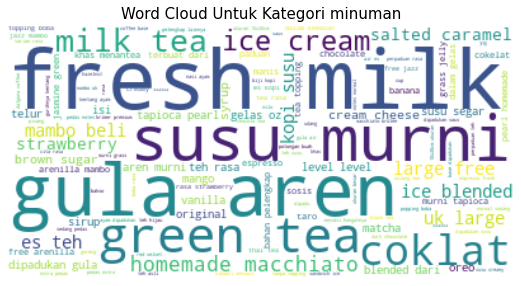

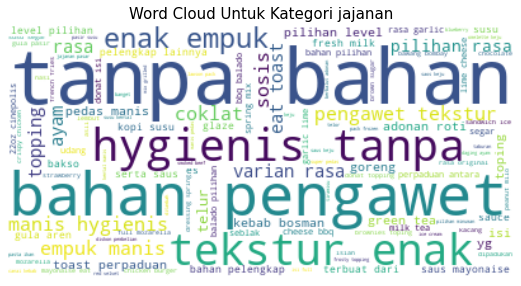

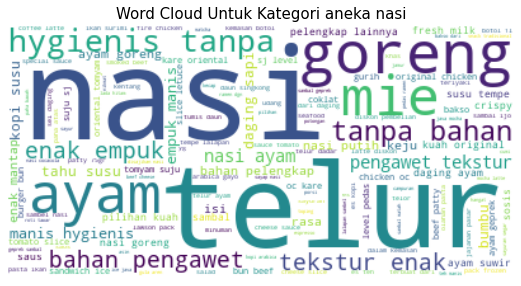

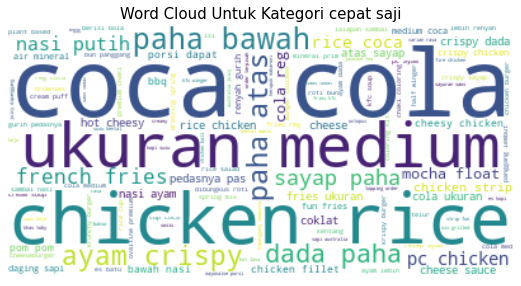

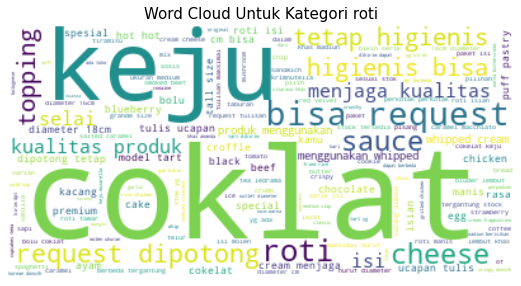

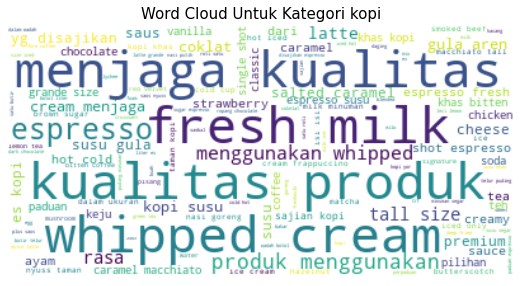

In [116]:
ax = plt.subplot(321)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[0]
stop_words = ["dengan", "with", "di", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "pcs", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[0]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(322)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[1]
stop_words = ["dengan", "yang", "pcs", "ala", "mohon", "maaf", "tidak", "untuk", "agar", "nya", "ini", "with", "di", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[1]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(323)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[2]
stop_words = ["yang", "dengan", "mohon", "maaf", "tidak", "untuk", "agar", "nya", "ini", "pcs", "with", "di", "ml", "ala", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[2]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(324)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[3]
stop_words = ["pcs", "ml", "dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[3]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(325)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[4]
stop_words = ["dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala", "pcs", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[4]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ax = plt.subplot(326)
mpl.rcParams['figure.figsize']=(20,20) 
mpl.rcParams['font.size']=50  
text = desc[5]
stop_words = ["dengan", "mohon", "maaf", "tidak", "yang", "untuk", "agar", "nya", "ini", "with", "di", "ala", "pcs", "pc", "dan", "and"]
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Kategori {}'.format(most_cat[5]), fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

`Most Value Description pada semua Kategori`

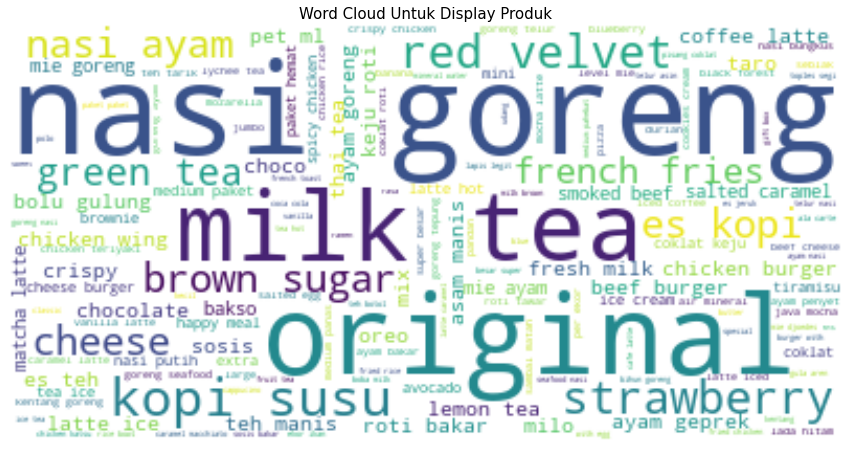

In [112]:
produk = listToString(data['product'].values)
produk = produk.replace('1l','').replace('(','').replace(')','').replace('/','').replace('+','').replace('-','')
produk = produk.replace('0','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','')
produk = produk.replace('6','').replace('7','').replace('8','').replace('9','').replace('&','').replace(',','')

mpl.rcParams['figure.figsize']=(15,15) 
mpl.rcParams['font.size']=50  
text = produk
stop_words = ["isi", "pcs", "pc", "gr"]
wordcloud = WordCloud(background_color='white', max_words=600,
                      max_font_size=100, random_state=1,
                      stopwords = stop_words).generate(text)
plt.title('Word Cloud Untuk Display Produk', fontsize=15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

`klaster produk pada ketiga kota`

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

datadesc['product'] = datadesc['product'].str.replace('ayam','chicken')
datadesc['product'] = datadesc['product'].str.replace('es','ice')
datadesc['product'] = datadesc['product'].str.replace('dingin','ice')
datadesc['product'] = datadesc['product'].str.replace('iced','ice')
datadesc['product'] = datadesc['product'].str.replace('susu','milk')
datadesc['product'] = datadesc['product'].str.replace('teh','tea')
datadesc['product'] = datadesc['product'].str.replace('choco','chocolate')
datadesc['product'] = datadesc['product'].str.replace('chocolat','chocolate')
datadesc['product'] = datadesc['product'].str.replace('chocolatee','chocolate')
datadesc['product'] = datadesc['product'].str.replace('cokelat','chocolate')
datadesc['product'] = datadesc['product'].str.replace('coklat','chocolate')
datadesc['product'] = datadesc['product'].str.replace('pisang','banana')
datadesc['product'] = datadesc['product'].str.replace('keju','cheese')
datadesc['product'] = datadesc['product'].str.replace('cheicee','cheese')
datadesc['product'] = datadesc['product'].str.replace('kopi','coffee')
datadesc['product'] = datadesc['product'].str.replace('caffe','coffee')
datadesc['product'] = datadesc['product'].str.replace('nasi','rice')
datadesc['product'] = datadesc['product'].str.replace('telur','egg')
datadesc['product'] = datadesc['product'].str.replace('telor','egg')
datadesc['product'] = datadesc['product'].str.replace('beef','sapi')
datadesc['product'] = datadesc['product'].str.replace('big','jumbo')
datadesc['product'] = datadesc['product'].str.replace('pcs','')
datadesc['product'] = datadesc['product'].str.replace('cm','')
documents = datadesc['product'].values.tolist()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top display produk per klaster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("klaster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top display produk per klaster:
klaster 0:
 chicken
 ice
 cheese
 tea
 milk
 paket
 chocolate
 coffee
 latte
 burger
klaster 1:
 rice
 goreng
 chicken
 egg
 fried
 mie
 bakar
 geprek
 putih
 paket


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


`klaster produk pada setiap kota`

In [114]:
city = data['merchant_area'].unique()

for i in city:
  datadesc = data[data.merchant_area==i]
  datadesc['product'] = datadesc['product'].str.replace('ayam','chicken')
  datadesc['product'] = datadesc['product'].str.replace('es','ice')
  datadesc['product'] = datadesc['product'].str.replace('dingin','ice')
  datadesc['product'] = datadesc['product'].str.replace('iced','ice')
  datadesc['product'] = datadesc['product'].str.replace('susu','milk')
  datadesc['product'] = datadesc['product'].str.replace('teh','tea')
  datadesc['product'] = datadesc['product'].str.replace('choco','chocolate')
  datadesc['product'] = datadesc['product'].str.replace('chocolat','chocolate')
  datadesc['product'] = datadesc['product'].str.replace('chocolatee','chocolate')
  datadesc['product'] = datadesc['product'].str.replace('cokelat','chocolate')
  datadesc['product'] = datadesc['product'].str.replace('coklat','chocolate')
  datadesc['product'] = datadesc['product'].str.replace('pisang','banana')
  datadesc['product'] = datadesc['product'].str.replace('keju','cheese')
  datadesc['product'] = datadesc['product'].str.replace('cheicee','cheese')
  datadesc['product'] = datadesc['product'].str.replace('kopi','coffee')
  datadesc['product'] = datadesc['product'].str.replace('caffe','coffee')
  datadesc['product'] = datadesc['product'].str.replace('nasi','rice')
  datadesc['product'] = datadesc['product'].str.replace('telur','egg')
  datadesc['product'] = datadesc['product'].str.replace('telor','egg')
  datadesc['product'] = datadesc['product'].str.replace('beef','sapi')
  datadesc['product'] = datadesc['product'].str.replace('big','jumbo')
  datadesc['product'] = datadesc['product'].str.replace('pcs','')
  datadesc['product'] = datadesc['product'].str.replace('cm','')
  documents = datadesc['product'].values.tolist()

  vectorizer = TfidfVectorizer(stop_words='english')
  X = vectorizer.fit_transform(documents)

  k = 2
  model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
  model.fit(X);

  print("Top display produk per klaster kota {} =".format(i))
  order_centroids = model.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names()
  for i in range(k):
      print("klaster %d:" % i),
      for ind in order_centroids[i, :10]:
          print(' %s' % terms[ind]),
      print

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Top display produk per klaster kota jakarta =
klaster 0:
 chicken
 cheese
 tea
 chocolate
 rice
 milk
 burger
 sapi
 paket
 medium
klaster 1:
 ice
 latte
 coffee
 tea
 milk
 matcha
 caramel
 vanilla
 sandwich
 mocha


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Top display produk per klaster kota medan =
klaster 0:
 chicken
 rice
 goreng
 tea
 ice
 cheese
 chocolate
 egg
 latte
 coffee
klaster 1:
 milk
 tea
 coffee
 brown
 sugar
 boba
 ice
 friceh
 bubble
 cheese


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr

Top display produk per klaster kota surabaya =
klaster 0:
 ice
 tea
 chocolate
 cheese
 roti
 rice
 milk
 goreng
 paket
 coffee
klaster 1:
 chicken
 rice
 goreng
 geprek
 burger
 wings
 crispy
 mie
 truffle
 paket
